# Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance

In [1]:
# 1. Import Packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2. Read Data
df = pd.read_csv(r"C:\\Users\\ROG\\Downloads\\Test_data.csv")

In [3]:
# 3. Inspect Data
print(df.head())
print(df.info())

   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

## Data Cleaning

In [4]:

# Check NULL values
print("\nMissing Values:\n", df.isnull().sum())

# Treat NULL values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(
    df['previous_year_rating'].median()
)


Missing Values:
 employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [5]:
# Remove duplicates
df = df.drop_duplicates()

In [6]:
# Drop identifier column (not useful for modeling)
df = df.drop(columns=['employee_id'])

print("\nAfter Cleaning:\n", df.isnull().sum())
print("Final Shape:", df.shape)


After Cleaning:
 department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64
Final Shape: (23490, 12)


## Visualization – Count Plots

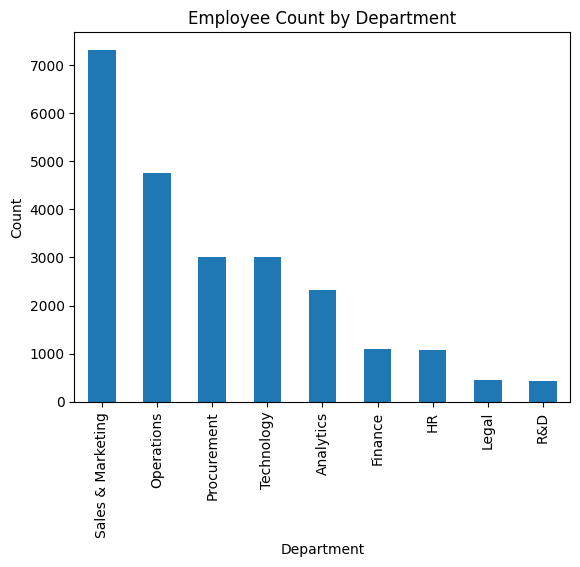

In [7]:
# Department
plt.figure()
df['department'].value_counts().plot(kind='bar')
plt.title("Employee Count by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

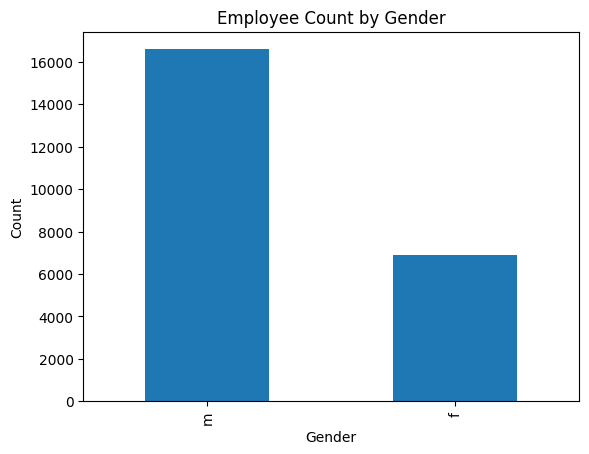

In [9]:
# Gender
plt.figure()
df['gender'].value_counts().plot(kind='bar')
plt.title("Employee Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

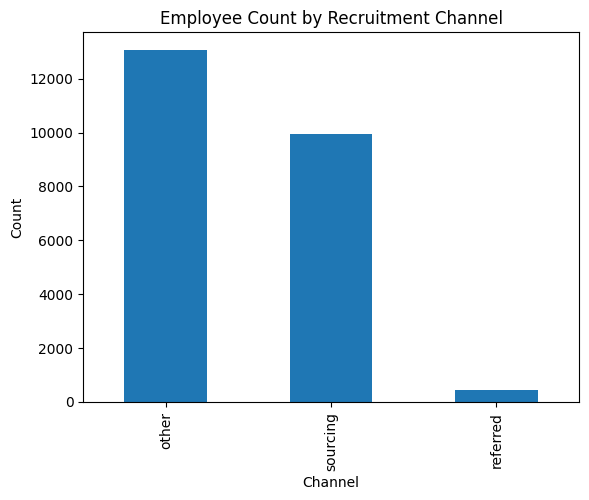

In [10]:
# Recruitment Channel
plt.figure()
df['recruitment_channel'].value_counts().plot(kind='bar')
plt.title("Employee Count by Recruitment Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

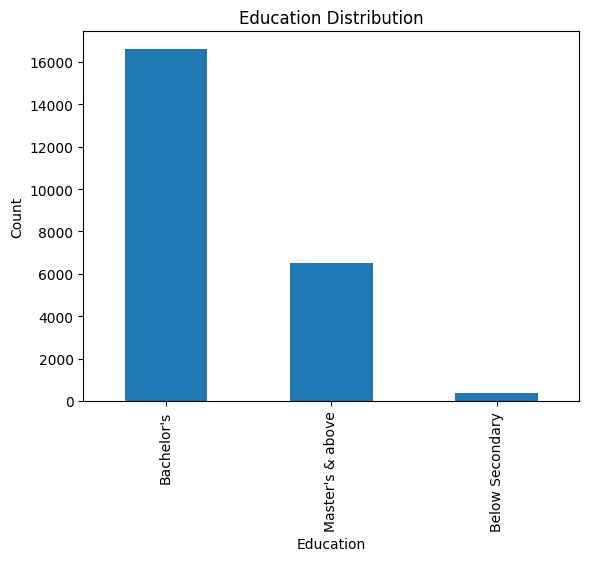

In [11]:

# Education
plt.figure()
df['education'].value_counts().plot(kind='bar')
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [ ]:
# Unique Values Check
print("\nUnique Values Per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique Values Per Column:

department: 9
region: 34
education: 3
gender: 2
recruitment_channel: 3
no_of_trainings: 9
age: 41
previous_year_rating: 5
length_of_service: 34
KPIs_met >80%: 2
awards_won?: 2
avg_training_score: 61


In [13]:
# Final Dataset Preview
print("\nFinal Cleaned Dataset:\n")
print(df.head())


Final Cleaned Dataset:

          department     region   education gender recruitment_channel  \
0         Technology  region_26  Bachelor's      m            sourcing   
1                 HR   region_4  Bachelor's      f               other   
2  Sales & Marketing  region_13  Bachelor's      m               other   
3        Procurement   region_2  Bachelor's      f               other   
4            Finance  region_29  Bachelor's      m            sourcing   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   24                   3.0                  1   
1                1   31                   3.0                  5   
2                1   31                   1.0                  4   
3                3   31                   2.0                  9   
4                1   30                   4.0                  7   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  77  
1              0 